In [22]:
import os
import pandas as pd
os.chdir('C:\\Users\\bpanda8\\OneDrive - DXC Production\\Desktop\\text')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import joblib
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pickle

<ipython-input-2-44848f0e31e3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category_id'] = data['Class'].factorize()[0]


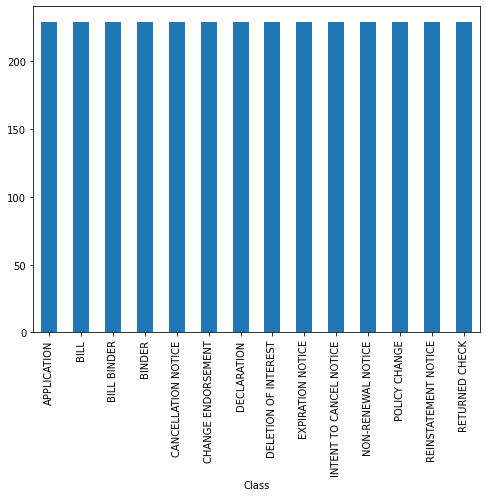

In [2]:
data1 = pd.read_csv('obscure_data.csv')
data1.head(1)
data = data1.iloc[:,[0,2]]
data.head(1)
data['category_id'] = data['Class'].factorize()[0]
g = data.groupby('category_id')
sampled = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
sampled.head()
fig = plt.figure(figsize=(8,6))
sampled.groupby('Class').text.count().plot.bar(ylim=0)
plt.show()

In [31]:
sampled.head()
X = sampled['text']
Y = sampled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,stratify =Y, 
                                                    random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
#pickle.dump (count_vect,open('transform.pkl','wb'))

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2', ngram_range=(2,2))
"""sublinear_tf - is set to be true for a logarithmic form of frequency, min_df - minimum number of documents
a word must be present to keep, norm is set to l2 to ensure all our feature vector to have an euclidean norm of 1, 
ngram_range is set for unigram and bigram as well, """
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=3100)),
                     ('clf', LinearSVC())])
model = pipeline.fit(X_train, y_train)
ytest = np.array(y_test)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

                         precision    recall  f1-score   support

            APPLICATION       0.78      0.78      0.78        58
                   BILL       0.54      0.70      0.61        57
            BILL BINDER       0.54      0.49      0.51        57
                 BINDER       0.62      0.48      0.54        58
    CANCELLATION NOTICE       0.64      0.61      0.62        57
     CHANGE ENDORSEMENT       0.98      0.86      0.92        58
            DECLARATION       0.42      0.44      0.43        57
   DELETION OF INTEREST       0.88      0.91      0.90        57
      EXPIRATION NOTICE       0.77      0.70      0.73        57
INTENT TO CANCEL NOTICE       0.79      0.77      0.78        57
     NON-RENEWAL NOTICE       0.80      0.86      0.83        57
          POLICY CHANGE       0.53      0.58      0.55        57
   REINSTATEMENT NOTICE       0.77      0.76      0.77        58
         RETURNED CHECK       0.85      0.91      0.88        57

               accuracy

In [29]:
print(dump_model.predict(["518781d21ed1 1015893e384a 5e99d31d8fa4 1f2955d33eb7 10e45001c2f2 e43c4b6f2c61 \
10e45001c2f2 d19b1c129f40 33043bd1c2f4 fea862065b74 7661e976aed0 e94953618947 af671fbeb212 422068f04236 f95d0bea231b \
6ce6cc5a3203 ba02159e05b1 6ce6cc5a3203 eb51798a89e1 f7ae6f8257da f52671c3d5de 0562c756a2f2 8f7a92cd0ae7 041a934b1778 \
b9699ce57810 f77ad3479ff2 586242498a88 97b6014f9e50 ff8452befa25 cbd6e2e7a804 4286dfd2ef60 4c61fbca6fc5 430ac7448a1d \
3bf369e20c6d 586242498a88 ce1f034abb5d eeb86a6a04e4 f77ad3479ff2 25c57acdf805 046a6770fd41 9f4f3695bf35 bad91ee8efd2 \
e2ba4f3a8f59 50747a6cf895 9976cedc3992 a20e78c41cf9 f708b79910ea 88feab596a13 e2ba4f3a8f59 34186de5c52d 9976cedc3992 \
970dc05fca39 f708b79910ea eb51798a89e1 6ce6cc5a3203 6bf9c0cb01b4 a024d1e04168 b32153b8b30c 036087ac04f9 f95d0bea231b \
2bcce4e05d9d fea862065b74 395a5e8185f8 9fde62bd8656 230eeddc0ae2 179dce4734b4 6dcc75eaf823 3fc879c6be39 1b6d0614f2c7 \
a0c020166d79 7b60ae3ac758 a8ed90271c88 93790ade6682 c33578d25a0d 4357c81e10c1 d9142bb5fbe2 a31962fbd5f3 85354da924c1 \
6365c4563bd1 1a34f3e0b37b 036087ac04f9 b136f6349cf3 b590e4634f73 86e830607415 2e811b614b76 3eee1ce2a7bf 6af770640118 \
7aa3fdca3e60 d38820625542 4286dfd2ef60 1cdf5fd423df 9976cedc3992 ce1f034abb5d e213b3898abc e43c4b6f2c61 1a34f3e0b37b \
f827423115e5 3e94b64be477 b590e4634f73 2ef7c27a5df4 36e7aa72ffe1 0562c756a2f2 041a934b1778 521006775597 f95d0bea231b \
0562c756a2f2 edd357b65c83 179dce4734b4 ba8f19d976a8 50747a6cf895 4632703f275b 477e72a5e4b8 5634ad8e3ac9 75440bb763a2 \
46fa01e8c226 036087ac04f9 9cb620b30bfb 0b091e7cc323 602cbb484d64 b136f6349cf3 eeb86a6a04e4 f77ad3479ff2 6dab0cc915bb \
f2b0e028fe2c 422068f04236 fe8d9fb0bfcd 54709b24b45f 5fa62998872f eca16ee06b98 ff8452befa25 6365c4563bd1 6365c4563bd1 \
4286dfd2ef60 9976cedc3992 fe64d3cdfe5b bd07decbbde9 d0952c28caf8 6b304aabdcee 6365c4563bd1 86e830607415 036087ac04f9 \
6bf9c0cb01b4 a024d1e04168 b32153b8b30c ad1257810e02 fe4454fbc589 b136f6349cf3 e43c4b6f2c61 f827423115e5 3e94b64be477 \
a1d5a5e41756 26f768da5068 7da4133ed99b 6ca2dd348663 eeb86a6a04e4 f77ad3479ff2 d38820625542"]))

['REINSTATEMENT NOTICE']


In [36]:
filename = 'multiclass_classifier.pkl'
joblib.dump(model,open(filename,'wb'))

dump_model = joblib.load('multiclass_classifier.pkl')


In [32]:
print(dump_model.predict(["586242498a88 9ccf259ca087 54709b24b45f 6bf9c0cb01b4 3486e5fe0d73 c337a85b8ef9 b2125dcdb706 f1424da4e7d6 5defc9f531f0 7ec02e30a5b3 f9e92c0357ef 6753b57205cb 5488cb2c0749 1ec85e7e2142 2685f0879380 b2125dcdb706 f1424da4e7d6 5defc9f531f0 b834a58b85b9 036087ac04f9 2bcce4e05d9d 6ca2dd348663 d38820625542 c9a53ea6e219 6dae7d5c1d03 1aba273fa8e4 0d66aace12f3 b6670dfb5ae7 5be138559904 b2125dcdb706 f1424da4e7d6 5defc9f531f0 b834a58b85b9 036087ac04f9 b136f6349cf3 186c2a8b23eb 7772cb33d419 e943e5e5b779 7a5e719bafba cbfb3eb99bea d38820625542 9287e6d15453 c85a9f2e0024 1c303d15eb65 351248ac109a 5ee06767bc0f ed1e3242ee34 cc27fc4409a9 4ce4bfb42e22 63e05aeec02b b9699ce57810 641356219cbc b2125dcdb706 f1424da4e7d6 5defc9f531f0 831d93352e04 21e314d3afcc ebbd827fe2a0 641356219cbc 422068f04236 d19b1c129f40 b9699ce57810 b834a58b85b9 f0666bdbc8a5 036087ac04f9 eeb86a6a04e4 2bcce4e05d9d 48d657cd9861 b643c02ad43a 831d93352e04 21e314d3afcc 2e182c67811b 641356219cbc d19b1c129f40 6ca2dd348663 831d93352e04 21e314d3afcc d38820625542 6bf9c0cb01b4 3486e5fe0d73 c337a85b8ef9 c9a53ea6e219 f7ae6f8257da 6dae7d5c1d03 b2125dcdb706 ecee69844b4e f1424da4e7d6 36e7aa72ffe1 5defc9f531f0 0302af775b89 7e0ebc43dbc1 1015893e384a 28ddf393019c 586242498a88 54709b24b45f 7ec02e30a5b3 5fa62998872f f9e92c0357ef 9f11111004ec 0ad17934ee05 c337a85b8ef9 be9f9e5522c9 446c804d79cc 6753b57205cb f7ae6f8257da eeb86a6a04e4 586242498a88 641356219cbc 446c804d79cc 5488cb2c0749 eeb86a6a04e4 1ec85e7e2142 25c57acdf805 4e9eb063e763 25c57acdf805 54709b24b45f de150c7d4218 641356219cbc ce1f034abb5d c3069551abe0 6bff0c8c1185 4df68bb4c0fe a20e78c41cf9 5e99d31d8fa4 a5f8a7c9a886 93790ade6682 4357c81e10c1 06e7c4534cb7 a31962fbd5f3 54709b24b45f b61f1af56200 6365c4563bd1 641356219cbc 446c804d79cc 97b6014f9e50 b3321da48f0d 2ef7c27a5df4 93c988b67c47 2bcce4e05d9d e67eb757a353 ff1c26ea0b6f 3d877a3bc4f0 0226fe922dd0 dec250bd255f 2556150a673a 2bcce4e05d9d 9bc65adc033c e0a34e168ea4 376aa3d8142d 036087ac04f9 2bcce4e05d9d e43c4b6f2c61 831d93352e04 21e314d3afcc 641356219cbc d19b1c129f40 26f768da5068 aed969aac7a8 6bf9c0cb01b4 3486e5fe0d73 c337a85b8ef9 b9699ce57810 641356219cbc 6bf9c0cb01b4 3486e5fe0d73 1b6d0614f2c7 6bf9c0cb01b4 3486e5fe0d73 c337a85b8ef9 c9a53ea6e219 6dae7d5c1d03 878460b4304e 133d46f7ed38 43af6db29054 7c19789847e6 7e0ebc43dbc1 de9738ee8b24 1015893e384a 586242498a88 e43c4b6f2c61 eeb86a6a04e4 641356219cbc 446c804d79cc f95d0bea231b aa1ef5f5355f"]))

['BILL']
